In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [2]:
# pandas көмегімен Housing.csv файлды оқыңыз:

df = pd.read_csv("Housing.csv")
df = df.head(100)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
96,3422049190,20150330T000000,247500.0,3,1.75,1960,15681,1.0,0,0,...,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


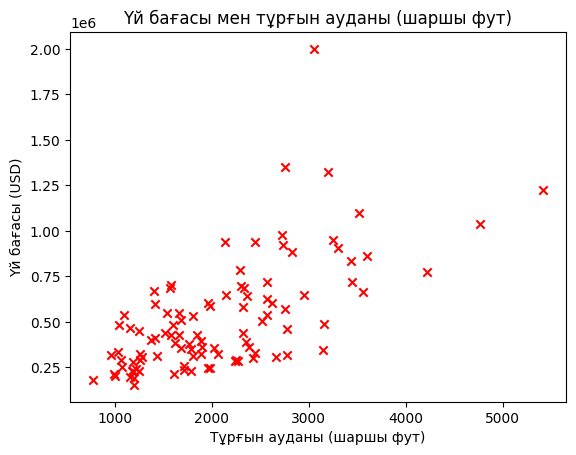

In [3]:
x = df['sqft_living']
y = df['price']

plt.scatter(x, y, marker='x', c='r')
plt.title("Үй бағасы мен тұрғын ауданы (шаршы фут)")
plt.xlabel("Тұрғын ауданы (шаршы фут)")
plt.ylabel("Үй бағасы (USD)")
plt.show()

In [4]:
def compute_loss(x, y, w, b):
    """
    Сызықтық регрессия үшін шығын функциясын есептейді.

  Args:
  x (ndarray): Пішін (m,) Үлгіге енгізу (үй ауданы)
  y (ndarray): Пішін (м,) Белгі (үйдің нақты бағасы)
  w, b (скаляр): Модельдің параметрлері

  Қайтарады
  total_loss (float): w,b мәндерін сызықтық регрессия үшін параметрлер ретінде пайдалану жоғалуы
  x және y деректер нүктелерін сәйкестендіру үшін
    """
    # оқыту деректерінің саны
    m = x.shape[0]

    # Бұл айнымалы мәнді дұрыс қайтару керек
    total_loss = 0.0

    ### КОДТЫ ОСЫ ЖЕРДЕ БАСТАҢЫЗ ###

    for i in range(m):
        y_pred = w * x[i] + b
        total_loss += (y_pred - y[i]) ** 2
    total_loss = total_loss / (2 * m)

    ### КОДТЫ ОСЫ ЖЕРДЕ АЯҚТАҢЫЗ ###

    return total_loss

In [5]:
from sklearn.model_selection import train_test_split

X_train = df['sqft_living'].to_numpy()
y_train = df['price'].to_numpy(y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
# x және y мәндерін Стандарттау

X_mean = np.mean(X_train)
X_std = np.std(X_train)

y_mean = np.mean(y_train)
y_std = np.std(y_train)


X_train = (X_train - X_mean) / X_std
y_train = (y_train - y_mean) / y_std

In [7]:
X_train

array([ 0.87164556, -0.58388084,  0.41828488,  1.7843322 ,  1.3130757 ,
        1.01481209,  0.56145141, -0.16631179, -0.2498256 ,  0.77620121,
       -1.12075533,  0.22739617,  0.04843801, -0.69125573, -0.61967247,
        3.96165652,  0.74040958,  0.8000623 ,  0.23932672, -0.2498256 ,
        0.77978037, -0.04700634, -1.24006077,  1.43238114, -0.83442226,
       -1.01338043, -0.23789505, -0.46457539,  0.50060564, -0.8702139 ,
        0.41828488, -0.16631179, -0.59581138, -1.04917206, -0.38106158,
       -0.82249172, -0.45861012, -0.52422811, -0.52422811, -1.2758524 ,
        0.179674  ,  0.26318781,  0.75234012, -0.63160301, -1.08496369,
        0.16774345, -1.32357458, -1.31164403, -1.00144988, -1.12075533,
        1.61133931,  2.52999121,  1.37272842, -1.01338043, -0.34526995,
        0.38249325,  1.58747822,  0.27511835, -0.61967247, -0.29754777,
       -0.66739465, -1.35936621,  0.31090998,  0.56145141,  0.56145141,
       -0.82249172,  1.13411754, -1.58604655, -1.22813023,  0.80

In [8]:
# w, b параметрлері үшін кейбір бастапқы мәндері бар шығындарды есептеу
initial_w = 1
initial_b = 2

loss = compute_loss(X_train, y_train, initial_w, initial_b)
print(type(loss))
print(f'Бастапқы w (нөлдер) кезіндегі шығын: {loss:.9f}')

<class 'numpy.float64'>
Бастапқы w (нөлдер) кезіндегі шығын: 2.346322474


In [9]:
def compute_gradient(x, y, w, b):
    """

    Сызықтық регрессия үшін градиентті есептейді
    Args:
      x (ndarray): Shape (m,) Үлгіге енгізу (үйдің ауданы)
      y (ndarray): Shape (m,) Белгі (үйдің нақты бағасы)
      w, b (scalar): Модельдің параметрлері
    Returns
      dj_dw (scalar): Параметр w бойынша шығын функциясының градиенті
      dj_db (scalar): Параметр b бойынша шығын функциясының градиенті
     """

    # Тренинг мысалдарының саны
    m = x.shape[0]

    # Параметр w бойынша шығын функциясының градиенті
    # Параметр b бойынша шығын функциясының градиенті
    dj_dw = 0
    dj_db = 0


    for i in range(m):
        f_wb = w * x[i] + b  # Модельдің болжауын есептеу (f_wb = wx + b)
        dj_db += f_wb - y[i]  # Шығын функциясының градиентін b параметрі бойынша қосу
        dj_dw += (f_wb - y[i]) * x[i]  # Шығын функциясының градиентін w параметрі бойынша қосу

    dj_dw /= m  # w бойынша орташа градиентті есептеу
    dj_db /= m  # b бойынша орташа градиентті есептеу



    return dj_dw, dj_db

In [10]:
# w нөлге дейін инициализацияланған градиентті есептеңіз және көрсетіңіз
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, initial_w, initial_b)
print('Градиент бастапқы w, b (нөл):', tmp_dj_dw, tmp_dj_db)

Градиент бастапқы w, b (нөл): -0.6536775257239935 -2.6367796834847467e-17


In [11]:
# Нөлден басқа w шығыны мен градиентті есептеу және көрсету
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, test_w, test_b)

print('w, b сынақындағы градиент:', tmp_dj_dw, tmp_dj_db)

w, b сынақындағы градиент: -0.45367752572399356 0.19999999999999998


In [12]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Тетаны үйрену үшін топтамалық градиентті түсіруді орындайды. Тетаны алу арқылы жаңартады
 Оқу жылдамдығы альфамен градиенттік қадамдар_саны

    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Iмодель параметрлерінің бастапқы мәндері
      cost_function: жоғалтуды есептеу функциясы
      gradient_function: градиентті есептеу функциясы
      alpha : (float) Оқу жылдамдығы
      num_iters : (int) градиенттің төмендеуін іске қосу үшін итерациялар саны
    Returns
      w : (ndarray): Shape (1,) Градиенттің төмендеуін іске қосқаннан кейін үлгі
      параметрлерінің жаңартылған мәндері
      b : (scalar)                Градиенттің төмендеуін іске қосқаннан кейін
      үлгі параметрінің жаңартылған мәні
    """

    # оқыту мысалдарының саны
    m = len(x)

    # Әрбір итерацияда J және w жоғалтуларын сақтауға арналған массив — ең
    # алдымен кейінірек графикті құру үшін
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #функция ішінде global w өзгертуден аулақ болыңыз
    b = b_in

    for i in range(num_iters):

        # Градиентті есептеңіз және параметрлерді жаңарту
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # w, b, альфа және градиент арқылы параметрлерді жаңарту
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Әрбір итерацияда J шығынын сақтаңыз
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Басып шығарудың жоғалуы әрбір аралықпен 10 рет немесе < 10 болса, сонша итерация
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Итерация {i:4}: Жоғалту {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #графика үшін w және J,w тарихын қайтару

In [13]:
#  параметрлерін инициализациялау. Еске салайық, w пішіні (n,)
initial_w = 0.
initial_b = 0.

# кейбір градиент түсіру параметрлері
iterations = 500
alpha = 0.5 # Оқыту жылдамдығы оңтайландыру кезінде үлгі параметрлерін жаңарту
# үшін градиентті төмендету алгоритмі орындайтын қадамдардың өлшемін басқаратын гиперпараметр болып табылады.

w,b,_,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                     compute_loss, compute_gradient, alpha, iterations)
print("w,b градиент бойынша төмендеді:", w, b)

Итерация    0: Жоғалту     0.34   
Итерация   50: Жоғалту     0.29   
Итерация  100: Жоғалту     0.29   
Итерация  150: Жоғалту     0.29   
Итерация  200: Жоғалту     0.29   
Итерация  250: Жоғалту     0.29   
Итерация  300: Жоғалту     0.29   
Итерация  350: Жоғалту     0.29   
Итерация  400: Жоғалту     0.29   
Итерация  450: Жоғалту     0.29   
w,b градиент бойынша төмендеді: 0.6536775257239933 5.759281940242994e-17


In [14]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

Text(0.5, 1.0, 'Үйдің ауданы vs бағалары')

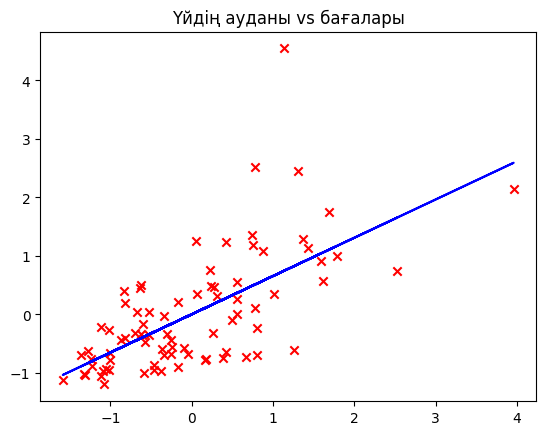

In [15]:
# Сызықтық сәйкестікті сал
plt.plot(X_train, predicted, c = "b")

# Мәліметтердің шашырау графигін жасаңыз.
plt.scatter(X_train, y_train, marker='x', c='r')
plt.title("Үйдің ауданы vs бағалары")

### Тапсырма - 2: Болжам жасау

y_pred есептеу әдісі әлі есіңізде ме?

$$
y_{\text{pred}}^{(i)} = wx^{(i)} + b
$$

In [16]:
def prediction(x, w, b):
    """
    Сызықтық регрессия үлгісін пайдаланып шығыс мәндерін болжайды.

    Args:
        x (ndarray): Мәліметтерді енгізу (мүмкіндіктер), пішін (m,).
        w (float): Модельдің салмақ параметрі.
        b (float): Модельдің ауытқу параметрі.

    Returns:
        y_pred (ndarray): Болжалды мәндер, пішін (m,).
    """
    # Сызықтық регрессия формуласын пайдаланып болжамдарды есептеңіз

    ### КОДТЫ ОСЫ ЖЕРДЕ БАСТАҢЫЗ ###
    x = (x - X_mean) / X_std
    y_pred_std = w * x + b
    y_pred = y_pred_std * y_std + y_mean
    ### КОДТЫ ОСЫ ЖЕРДЕ АЯҚТАҢЫЗ ###


    return y_pred


In [17]:
predict1 = prediction(1180, w, b)
print('1180 шаршы фут аумақ үшін бізге келесі бағаны төлеу қажет $%.2f' % predict1)

predict2 = prediction(2570, w, b)
print('2570 шаршы фут аумақ үшін бізге келесі бағаны төлеу қажет $%.2f' % predict2)

1180 шаршы фут аумақ үшін бізге келесі бағаны төлеу қажет $308173.18
2570 шаршы фут аумақ үшін бізге келесі бағаны төлеу қажет $656857.73


In [18]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
96,3422049190,20150330T000000,247500.0,3,1.75,1960,15681,1.0,0,0,...,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
